<a href="https://colab.research.google.com/github/pytee/geminiintro/blob/main/introgemini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q -U google-generativeai

In [2]:
import textwrap
import google.generativeai as genai
from IPython.display import Markdown
import PIL.Image
import urllib.request

In [10]:
# Used to securely store your API key
from google.colab import userdata
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get("GEMINI_API_KEY")
genai.configure(api_key=GOOGLE_API_KEY)

In [11]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-pro
models/gemini-pro-vision


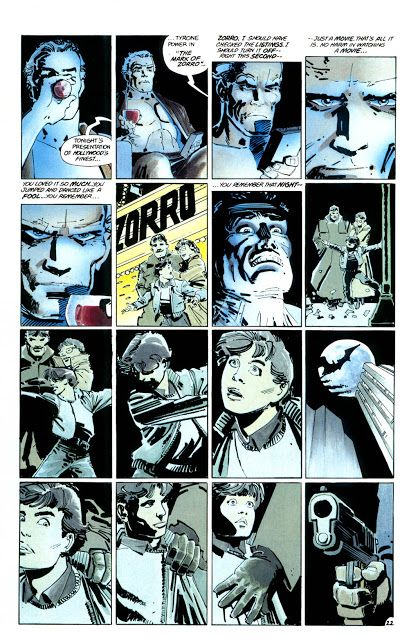

In [12]:
# Opening the image for Image Understanding
urllib.request.urlretrieve(
  'https://i.imgur.com/RxsIzEy.png',
   "comic.png")
image = PIL.Image.open('comic.png')
image

In [13]:
model = genai.GenerativeModel("gemini-pro-vision")
def to_markdown(text):
    text = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))
response = model.generate_content(image)
to_markdown(response.text)

>  "Just a movie. That's all it is. No harm in watching a movie."

In [14]:
response = model.generate_content(
    ["Write an explanation based on the image, give the name of the author and the book that it is from", image],
    stream=True
)
response.resolve()
to_markdown(response.text)

>  The image is from the graphic novel Batman: The Dark Knight Returns by Frank Miller. The scene is where Batman, after being shot by Carrie Kelley (the new Robin), hallucinates that he is having a conversation with his dead parents, Thomas and Martha Wayne. In the hallucination, his parents tell him that he is a fool for continuing to fight crime and that he should give up. However, Batman rejects their advice and reaffirms his commitment to fighting for justice.